In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from random import shuffle
import cv2 as cv
import os
import math
from random import shuffle

In [2]:
%%time

def delete_zero_files_from_list(directory):
    del_files_list = []
    for f in directory:
        if os.path.getsize(f) < 100:
            del_files_list += [f]
    
    for f in del_files_list:
        directory.remove(f)

#image_dir = '/home/alexey/programming/Convermax_projects/texture_classifiation/data/learn_data_t_f/'
#image_dir = '/home/alexey/programming/keggle_tasks/google_landmark/learn_images_data/'
image_dir = '/home/alexey/programming/keggle_tasks/iMaterialist_Challenge/train_data/'
names = os.listdir(image_dir)

shuffle(names)

start_count = len(names)

start_shape = (256, 256, 3)

images_path_list = [os.path.normpath(image_dir + fname) for fname in names]
delete_zero_files_from_list(images_path_list)

print("Всего изображений:", len(images_path_list))
print("Не рассматривается изображений:", start_count - len(images_path_list))

def resize_coeff(x, new_x):
    return new_x / x

def parse_images(images_path_list):
    '''
    images_list = [cv.imread(img, 0) for img in images_path_list]    
    
    resize_images = [cv.resize(img, None, fx=resize_coeff(img.shape[1], start_shape[0]),
            fy=resize_coeff(img.shape[0], start_shape[1]), interpolation = cv.INTER_CUBIC) for img in images_list]
    
    bw = [cv.adaptiveThreshold(img,
                            255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 2)
                        for img in images_list]
    
    bw = [cv.resize(img, None, fx=resize_coeff(img.shape[1], start_shape[0]),
            fy=resize_coeff(img.shape[0], start_shape[1]), interpolation = cv.INTER_CUBIC) for img in bw]
    
    bw = np.array([cv.adaptiveThreshold(img,
                            255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 2)
                        for img in bw], dtype=np.float32)
    
    gray = np.array([img for img in resize_images], dtype=np.float32)
    
    #laplasian = np.array([cv.Laplacian(img, cv.CV_64F) for img in resize_images], dtype=np.float32)
    '''
    color = [cv.imread(img, 1) for img in images_path_list]
    color = [cv.resize(img, None, fx=resize_coeff(img.shape[1], start_shape[0]),
            fy=resize_coeff(img.shape[0], start_shape[1]), interpolation = cv.INTER_AREA) for img in color]

    return color

Всего изображений: 51548
Не рассматривается изображений: 0
CPU times: user 208 ms, sys: 60 ms, total: 268 ms
Wall time: 267 ms


In [3]:
def change_to_0_1(x):
    x = np.array(x).astype('float32') / 255.
    x = np.reshape(x, (len(x), start_shape[0], start_shape[1], 3))
    return x

def norm_size(x, bs):
    return x[0:(len(x) - len(x) % bs)]

#ЗАЮЗАТЬ ТЕМУ!
print_arr = []
images_path_list1 = []

def norm(x1, x2):
    res = 0.0
    for i in range(0, len(x1)):
        res += (x1[i] - x2[i]) ** 2
    return math.sqrt(res)

def get_distance(a, b):
    ind1 = images_path_list1.index(os.path.normpath(image_dir + a))
    ind2 = images_path_list1.index(os.path.normpath(image_dir + b))
    return norm(encoded_images[ind1], encoded_images[ind2])

def get_distance_from_tsne(a, b):
    ind1 = images_path_list1.index(os.path.normpath(image_dir + a))
    ind2 = images_path_list1.index(os.path.normpath(image_dir + b))
    return norm(p_field[ind1], p_field[ind2])
    
    if norm_flag:
        img1 = img.astype('float32') / 255.
    else:
        img1 = img
    
    ax = plt.subplot(int(scale), 1, 1)
    
    if not kernel:
        plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
    else:
        plt.imshow(img1)
        plt.gray()
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(title)
    
    plt.show()

def print_image_encoding(img, print_decoder=True, print_wb=True):
    ind = images_path_list1.index(os.path.normpath(image_dir + img))
    
    plt.figure(figsize=(20, 10))
    

def get_distance_from_data(d, iname):
    ind = images_path_list1.index(os.path.normpath(image_dir + iname))
    return norm(d, encoded_images[ind])

def print_image(img, title='Image', scale=1, norm_flag=True, kernel=False):    
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(2, 1, 1)
    plt.imshow(img.reshape(start_shape))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()
    
def print_image_encoding_from_data(data, print_decoder=True):
    
    plt.figure(figsize=(20, 10))
    
    ax = plt.subplot(2, 1, 1)
    plt.imshow(cv.cvtColor(data.reshape(start_shape), cv.COLOR_BGR2RGB))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    batch_vector = [data]*batch_size
    batch_vector = np.resize(batch_vector, (batch_size, start_shape[0], start_shape[1], 3))
    var_image = models["autoencoder"].predict(batch_vector)[0]
    
    if print_decoder:
        ax = plt.subplot(2, 1, 2)
        plt.imshow(cv.cvtColor(var_image.reshape(start_shape), cv.COLOR_BGR2RGB))
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
def print_image_from_array(img, arr):
    ind = images_path_list1.index(os.path.normpath(image_dir + img))
    
    plt.figure(figsize=(20, 10))
    
    ax = plt.subplot(2, 1, 1)
    plt.imshow(cv.cvtColor(arr[ind].reshape(start_shape), cv.COLOR_BGR2RGB))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(img)
    plt.show()
    
def print_original_image(img, scale=1):
    ind = images_path_list1.index(os.path.normpath(image_dir + img))
    image = cv.imread(images_path_list[ind], 0)
    print_image(image, img, scale)
    
def print_kernel(img):
    ind = images_path_list1.index(os.path.normpath(image_dir + img))
    kernel = encoded_images[ind]
    kernel = np.reshape(kernel, (latent_dim_sqrt, latent_dim_sqrt))
    print_image(kernel, img, 3, False, True)
    
def print_kernel_from_data(data):
    batch_vector = [data]*batch_size
    batch_vector = np.resize(batch_vector, (batch_size, start_shape[0], start_shape[1], 3))
    encoded_data = models["encoder"].predict(batch_vector)[0]
    encoded_data = np.reshape(encoded_data, (latent_dim_sqrt, latent_dim_sqrt))
    print_image(encoded_data, 'kernel', 3, False, True)
    
def SortByKernel(x):
    return x[1];

def get_k_simple(img, k, d_func=get_distance):
    images_pair = [(i, d_func(img, i)) for i in names[0:len(encoded_images)]]
    images_pair.sort(key=SortByKernel)
    return [i[0] for i in images_pair[0:k]]

def get_k_simple_from_data(d, k):
    images_pair = [(i, get_distance_from_data(d, i)) for i in names[0:len(encoded_images)]]
    images_pair.sort(key=SortByKernel)
    return [i[0] for i in images_pair[0:k]]

def name_last_parse(S):
    return S[S.rindex('/') + 1:len(S)]

def full_view_by_image_name(iname, view_encoding=True, view_kernel=True):
    data = change_to_0_1(parse_images([iname]))[0]
    print_image_encoding_from_data(data, view_encoding)
    
    if view_kernel:
        print_kernel_from_data(data)
    
def get_kernel_by_image_name(iname):
    batch_vector = [change_to_0_1(parse_images([iname]))[0]]*batch_size
    batch_vector = np.resize(batch_vector, (batch_size, start_shape[0], start_shape[1], 3))
    encoded_data = models["encoder"].predict(batch_vector)[0]
    return np.reshape(encoded_data, (latent_dim_sqrt, latent_dim_sqrt))

def get_kernel_distance(im1, im2):
    return norm(get_kernel_by_image_name(im1).flatten(), get_kernel_by_image_name(im2).flatten())

def get_k_simple_to_image_by_images_names_list(iname, inames_list, k):
    images_pair = [(i, get_kernel_distance(iname, i)) for i in inames_list]
    images_pair.sort(key=SortByKernel)
    return [i[0] for i in images_pair[0:k]]

In [29]:
images_path_list1 = images_path_list

In [5]:
X = change_to_0_1(parse_images(images_path_list1))

In [30]:
X.shape

(2500, 256, 256, 3)

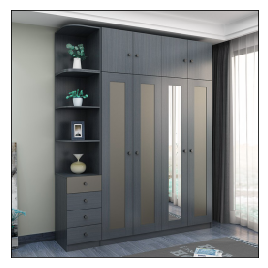

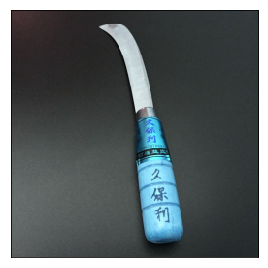

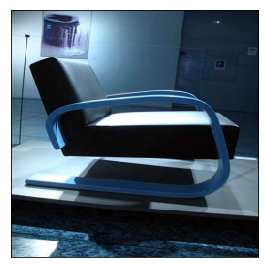

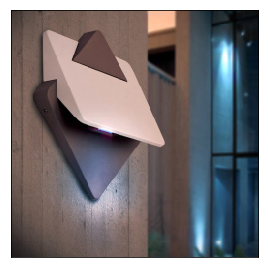

In [31]:
for ind in [0, 5, 10, 15]:
    print_image(X[ind])

In [32]:
import json

def ParseData(data_file):
    ann = {}
    if 'train' in data_file or 'validation' in data_file:
        _ann = json.load(open(data_file))['annotations']
        for a in _ann:
            ann[a['image_id']] = a['label_id']

    key_url_list = []
    j = json.load(open(data_file))
    images = j['images']
    for item in images:
        assert len(item['url']) == 1
        url = item['url'][0]
        id_ = item['image_id']
        if id_ in ann:
            id_ = "{}_{}".format(id_, ann[id_])
        key_url_list.append((id_, url))
    return key_url_list

def get_image_label_from_json_by_url(json_data, image_url):
    res_label= -1
    for line in json_data['images']:
        if line['url'][0] == image_url:
            res_id = line['image_id']
            res_label = json_data['annotations'][res_id - 1]['label_id']
            break
    return res_label


json_filename = os.path.normpath('/home/alexey/programming/keggle_tasks/iMaterialist_Challenge/train.json')
json_train = json.load(open(json_filename))
second_indexes_json = ParseData(json_filename)

def get_image_label_from_json(json_data, image_name, second_indexes_json=second_indexes_json):
    res_label = -1
    for (name, url) in second_indexes_json:
        if name + '.jpg' == image_name:
            res_label = get_image_label_from_json_by_url(json_data, url)
    return res_label

def get_labels_list(json_data, images_list):
    return [get_image_label_from_json(json_data, name_last_parse(im)) for im in images_list]  

In [33]:
%%time
images_labels = get_labels_list(json_train, images_path_list1)

CPU times: user 14min 12s, sys: 1.66 s, total: 14min 14s
Wall time: 14min 9s


In [38]:
def one_hot(Y, K):
    res = []
    for y in Y:
        y_res = [0]*K
        y_res[y - 1] = 1
        res += [y_res]
    return res

Kls = 128
one_hot_labels = one_hot(images_labels, Kls)

def get_labels_from_predict_vector(X):
    return [x.argmax() + 1 for x in X] 

def acc(Y, Y_ans):
    res = 0
    for i in range(len(Y)):
        if Y[i] == Y_ans[i]:
            res += 1
    return res / len(Y)

batch_size = 4

In [46]:
from threading import Thread, Lock
from queue import Queue

class Worker(Thread):
    """ Thread executing tasks from a given tasks queue """
    def __init__(self, tasks):
        Thread.__init__(self)
        self.tasks = tasks
        self.daemon = True
        self.start()

    def run(self):
        while True:
            func, args, kargs = self.tasks.get()
            try:
                func(*args, **kargs)
            except Exception as e:
                print(e)
            finally:
                self.tasks.task_done()


class ThreadPool:
    """ Pool of threads consuming tasks from a queue """
    def __init__(self, num_threads):
        self.tasks = Queue(num_threads)
        for _ in range(num_threads):
            Worker(self.tasks)

    def add_task(self, func, *args, **kargs):
        """ Add a task to the queue """
        self.tasks.put((func, args, kargs))

    def map(self, func, args_list):
        """ Add a list of tasks to the queue """
        for args in args_list:
            self.add_task(func, args)

    def wait_completion(self):
        """ Wait for completion of all the tasks in the queue """
        self.tasks.join()
        
        
def change_to_0_1(x):
    x = np.array(x).astype('float32') / 255.
    x = np.reshape(x, (len(x), start_shape[0], start_shape[1], 3))
    return x

def norm_size(x, bs):
    return x[0:(len(x) - len(x) % bs)]



gpu_model_lock = Lock()



def nn_fit(model, X, Y, validation_size, batch_size):
    x_train = change_to_0_1(parse_images(X))
    
    gpu_model_lock.acquire()
    model.fit(x_train, np.array(Y), shuffle=True, batch_size=batch_size, validation_split=0.1)
    gpu_model_lock.release()
    
    del x_train

    
    
def parting_predict_keras_model(images_names_list, labels, model, queue_length, images_in_part, epochs, batch_size=batch_size):  
    print('#######################################################################')

    N = len(images_names_list) // images_in_part
    if len(images_names_list) % images_in_part != 0:
        N += 1

    pool = ThreadPool(queue_length)
        
    for e in range(epochs):
        nn_fit(model, images_names_list[0:100], labels[0:100], 20, batch_size)
        for i in range(N):
            left = i*images_in_part
            right = (i+1)*images_in_part
            if right > len(images_names_list):
                right = len(images_names_list)
                
            print("Шаг обучения на элементах:", left, ":", right, "из", len(images_names_list))
            print("Количество элементов для текущего шага обучения:", len(images_names_list),"эпоха",
                  str(e + 1) + '/' + str(epochs))
            
            pool.add_task(nn_fit, model, images_names_list[left:right], labels[left:right], 20, batch_size)
            
            print("Обучение данного набора занесено в очередь")
            print('#######################################################################')
    
    pool.wait_completion()
    
    print("Обучение нейронной сети успешно завершено!")

In [40]:
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dense, UpSampling2D, Reshape, Flatten, BatchNormalization, Lambda
from keras.layers import LeakyReLU, Input, Dropout, Conv2DTranspose
from keras.models import Model
from keras.objectives import binary_crossentropy
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
from keras import losses
from keras.models import load_model
from keras.applications.vgg19 import VGG19 as BaseModel
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

def apply_bn_and_dropout(x):
        return Dropout(0.4)(x)

input_img = Input(shape=start_shape) 

base_model = BaseModel(include_top=False, input_tensor=input_img, classes=1000)

inp = Input(shape=(base_model.output_shape[1], base_model.output_shape[2], base_model.output_shape[3]))
x = Flatten()(inp)
x = Dense(256, activation='elu')(x)
x = apply_bn_and_dropout(x)
m = Dense(Kls, activation='softmax')(x)
m_neur_model = Model(inp, m, 'ClassifierNN')

cls_neur_model = Model(input_img, m_neur_model(base_model(input_img)), 'ClassifierNN')
cls_neur_model.compile(optimizer='sgd', loss='binary_crossentropy')
cls_neur_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
vgg19 (Model)                (None, 8, 8, 512)         20024384  
_________________________________________________________________
ClassifierNN (Model)         (None, 128)               8421760   
Total params: 28,446,144
Trainable params: 28,446,144
Non-trainable params: 0
_________________________________________________________________


In [49]:
#TEST_N = 150
#cls_neur_model.fit(X[TEST_N:len(X)], np.array(one_hot_labels[TEST_N:len(X)]), epochs=25, batch_size=4, verbose=1, shuffle=True, validation_split=0.01)

In [50]:
%%time
E = 15
for i in range(E):
    print('Epoch:', i + 1, 'from', E)
    
    nn_fit(cls_neur_model, images_path_list[0:100], one_hot_labels[0:100], 20, batch_size)
    parting_predict_keras_model(images_path_list, one_hot_labels, cls_neur_model, 5, 200, 1, batch_size)
    nn_fit(cls_neur_model, images_path_list[0:100], one_hot_labels[0:100], 20, batch_size)
    
    gpu_model_lock.acquire()
    m_neur_model.save_weights('ClassifierNN_weights.h5')
    gpu_model_lock.release()

Epoch: 1 from 15
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 23ms/step - loss: 0.0148 - val_loss: 0.0103
#######################################################################
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 23ms/step - loss: 0.0102 - val_loss: 0.0132
Шаг обучения на элементах: 0 : 200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
Обучение данного набора занесено в очередь
#######################################################################
Шаг обучения на элементах: 200 : 400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
Обучение данного набора занесено в очередь
#######################################################################
Шаг обучения на элементах: 400 : 600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
Обучение данного набора занесено в очередь
#######################

180/180 [==============================] - 4s 23ms/step - loss: 0.0137 - val_loss: 0.0129
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 5200 : 5400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0156 - val_loss: 0.0148
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples
Epoch 1/1
#######################################################################
Шаг обучения на элементах: 5400 : 5600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0136 - val_loss: 0.0157
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0130 - val_loss: 0.0059
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1
#######################################################################

Шаг обучения на элементах: 9600 : 9800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0136 - val_loss: 0.0096
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 9800 : 10000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0112 - val_loss: 0.0067
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epo

180/180 [==============================] - 4s 23ms/step - loss: 0.0091 - val_loss: 0.0078
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 14000 : 14200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0115 - val_loss: 0.0086
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

#######################################################################
Шаг обучения на элементах: 14200 : 14400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0095 - val_loss: 0.0136
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################E

180/180 [==============================] - 4s 23ms/step - loss: 0.0115 - val_loss: 0.0043
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 18400 : 18600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0093 - val_loss: 0.0181
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 18600 : 18800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0102 - val_loss: 0.0144
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0112 - val_loss: 0.0090
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 22800 : 23000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0095 - val_loss: 0.0115
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 23000 : 23200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0091 - val_loss: 0.0078
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0111 - val_loss: 0.0101
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 27200 : 27400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0083 - val_loss: 0.0055
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 27400 : 27600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0100 - val_loss: 0.0051
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 24ms/step - loss: 0.0118 - val_loss: 0.0169
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

#######################################################################Epoch 1/1

Шаг обучения на элементах: 31600 : 31800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 5s 27ms/step - loss: 0.0106 - val_loss: 0.0052
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################
Шаг обучения на элементах: 
31800Epoch 1/1 
: 32000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0102 - val_loss: 0.0071
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1
##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0109 - val_loss: 0.0036
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 36000 : 36200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0087 - val_loss: 0.0081
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 36200 : 36400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0076 - val_loss: 0.0038
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################E

180/180 [==============================] - 4s 23ms/step - loss: 0.0094 - val_loss: 0.0077
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 40400 : 40600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0076 - val_loss: 0.0076
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

#######################################################################Epoch 1/1

Шаг обучения на элементах: 40600 : 40800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0102 - val_loss: 0.0068
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################E

180/180 [==============================] - 4s 23ms/step - loss: 0.0095 - val_loss: 0.0038
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 44800 : 45000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0069 - val_loss: 0.0017
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 45000 : 45200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0094 - val_loss: 0.0054
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0069 - val_loss: 0.0042
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################

Шаг обучения на элементах:Epoch 1/1 
49200 : 49400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0082 - val_loss: 0.0049
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 49400 : 49600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0066 - val_loss: 0.0085
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################E

Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0050 - val_loss: 0.0072
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 2200 : 2400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0075 - val_loss: 0.0037
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 2400 : 2600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0067 - val_loss: 0.0112
Обучение данного набора занесено в очередь
##################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0091 - val_loss: 0.0068
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 6600 : 6800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0057 - val_loss: 0.0078
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 6800 : 7000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0073 - val_loss: 0.0065
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch

180/180 [==============================] - 4s 23ms/step - loss: 0.0048 - val_loss: 0.0069
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 11000 : 11200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0059 - val_loss: 0.0056
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 11200 : 11400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0072 - val_loss: 0.0103
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0049 - val_loss: 0.0039
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 15400 : 15600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0061 - val_loss: 0.0073
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 15600 : 15800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0077 - val_loss: 0.0110
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0073 - val_loss: 0.0097
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 19800 : 20000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0057 - val_loss: 0.0114
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 20000 : 20200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0061 - val_loss: 0.0031
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0069 - val_loss: 0.0070
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 24200 : 24400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0053 - val_loss: 0.0028
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 24400 : 24600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0048 - val_loss: 0.0049
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0045 - val_loss: 0.0083
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 28600 : 28800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0068 - val_loss: 0.0045
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 28800 : 29000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0052 - val_loss: 0.0149
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1###############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0068 - val_loss: 0.0022
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Шаг обучения на элементах:Epoch 1/1 
33000 : 33200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0058 - val_loss: 0.0029
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1
#######################################################################
Шаг обучения на элементах: 33200 : 33400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0048 - val_loss: 0.0053
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0056 - val_loss: 0.0049
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 37400 : 37600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0063 - val_loss: 0.0053
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 37600 : 37800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0059 - val_loss: 0.0162
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0051 - val_loss: 0.0039
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 41800 : 42000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0058 - val_loss: 0.0019
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 42000 : 42200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0064 - val_loss: 0.0044
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1###############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0061 - val_loss: 0.0023
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 46200 : 46400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0043 - val_loss: 0.0046
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 46400 : 46600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0039 - val_loss: 0.0091
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0057 - val_loss: 0.0115
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 50600 : 50800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0053 - val_loss: 0.0018
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 50800 : 51000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0051 - val_loss: 0.0031
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1###############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0049 - val_loss: 0.0047
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 3200 : 3400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0048 - val_loss: 0.0065
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 3400 : 3600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0062 - val_loss: 0.0066
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0039 - val_loss: 0.0028
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 7600 : 7800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0043 - val_loss: 0.0016
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 7800 : 8000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0041 - val_loss: 0.0097
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoc

180/180 [==============================] - 4s 23ms/step - loss: 0.0041 - val_loss: 0.0101
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 12000 : 12200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0036 - val_loss: 0.0030
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 12200 : 12400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0041 - val_loss: 0.0061
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1###############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0042 - val_loss: 0.0086
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 16400 : 16600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0072 - val_loss: 0.0028
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 16600 : 16800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0046 - val_loss: 0.0031
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################E

180/180 [==============================] - 4s 23ms/step - loss: 0.0044 - val_loss: 0.0040
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 20800 : 21000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0042 - val_loss: 0.0016
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 21000 : 21200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0040 - val_loss: 0.0079
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0057 - val_loss: 0.0093
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 25200 : 25400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0050 - val_loss: 0.0068
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 25400 : 25600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0049 - val_loss: 0.0044
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0048 - val_loss: 0.0071
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 29600 : 29800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0040 - val_loss: 0.0055
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 29800 : 30000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0049 - val_loss: 0.0046
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################E

180/180 [==============================] - 4s 23ms/step - loss: 0.0066 - val_loss: 0.0051
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 34000 : 34200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0051 - val_loss: 0.0031
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 34200 : 34400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0047 - val_loss: 0.0076
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1###############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0038 - val_loss: 0.0054
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 38400 : 38600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0046 - val_loss: 0.0177
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 38600 : 38800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0039 - val_loss: 0.0082
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0059 - val_loss: 0.0038
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 42800 : 43000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0046 - val_loss: 0.0073
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 43000 : 43200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0027 - val_loss: 0.0061
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1###############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0045 - val_loss: 7.9311e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 47200 : 47400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0045 - val_loss: 0.0051
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 47400 : 47600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0046 - val_loss: 0.0042
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#####################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0039 - val_loss: 0.0025
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0052 - val_loss: 4.2271e-04
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0053 - val_loss: 8.3597e-05
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0055 - val_loss: 0.0069
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0061 - val_loss: 0.0072
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0060 - val_loss: 0.0025
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180

180/180 [==============================] - 4s 22ms/step - loss: 0.0037 - val_loss: 0.0061
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 4200 : 4400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 22ms/step - loss: 0.0040 - val_loss: 2.3482e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 4400 : 4600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 22ms/step - loss: 0.0053 - val_loss: 0.0057
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

#######################################################################E

180/180 [==============================] - 4s 23ms/step - loss: 0.0043 - val_loss: 0.0095
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 8600 : 8800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0026 - val_loss: 0.0045
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 8800 : 9000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0039 - val_loss: 0.0070
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0040 - val_loss: 0.0068
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 13000 : 13200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0030 - val_loss: 0.0028
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 13200 : 13400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0032 - val_loss: 0.0045
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0028 - val_loss: 0.0089
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 17400 : 17600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0035 - val_loss: 0.0120
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 17600 : 17800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0035 - val_loss: 0.0042
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################E

180/180 [==============================] - 4s 23ms/step - loss: 0.0040 - val_loss: 0.0026
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 21800 : 22000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0027 - val_loss: 5.1478e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 22000 : 22200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0027 - val_loss: 0.0088
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##########################################################

180/180 [==============================] - 4s 24ms/step - loss: 0.0037 - val_loss: 0.0041
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 26200 : 26400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0026 - val_loss: 0.0042
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 26400 : 26600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0035 - val_loss: 0.0023
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0035 - val_loss: 0.0027
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 30600 : 30800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0028 - val_loss: 0.0117
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

#######################################################################Epoch 1/1

Шаг обучения на элементах: 30800 : 31000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0023 - val_loss: 7.3950e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##########################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0038 - val_loss: 1.2193e-04
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 35000 : 35200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0036 - val_loss: 0.0026
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 35200 : 35400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0032 - val_loss: 0.0054
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

####################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0039 - val_loss: 0.0025
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 39400 : 39600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0029 - val_loss: 0.0067
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 39600 : 39800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0041 - val_loss: 0.0044
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0033 - val_loss: 0.0062
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 43800 : 44000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0043 - val_loss: 0.0036
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 44000 : 44200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0035 - val_loss: 0.0082
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################E

180/180 [==============================] - 4s 23ms/step - loss: 0.0044 - val_loss: 0.0022
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 48200 : 48400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0033 - val_loss: 0.0077
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 48400 : 48600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0041 - val_loss: 0.0037
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################E

180/180 [==============================] - 4s 23ms/step - loss: 0.0027 - val_loss: 0.0024
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 5000 : 5200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0033 - val_loss: 0.0053
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 5200 : 5400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0034 - val_loss: 0.0080
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0026 - val_loss: 0.0047
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 9400 : 9600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0027 - val_loss: 3.0800e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 9600 : 9800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0026 - val_loss: 0.0038
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################E

180/180 [==============================] - 4s 23ms/step - loss: 0.0044 - val_loss: 0.0026
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 13800 : 14000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0018 - val_loss: 0.0040
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 14000 : 14200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0036 - val_loss: 0.0020
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0035 - val_loss: 0.0058
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 18200 : 18400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0027 - val_loss: 0.0023
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

#######################################################################
Шаг обучения на элементах: 18400 : 18600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0017 - val_loss: 0.0076
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 24ms/step - loss: 0.0023 - val_loss: 0.0165
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 22600 : 22800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0026 - val_loss: 0.0064
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 22800 : 23000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0030 - val_loss: 0.0028
Train on 180 samples, validate on 20 samples
Epoch 1/1Обучение данного набора занесено в очередь

##############################################################

180/180 [==============================] - 4s 24ms/step - loss: 0.0030 - val_loss: 0.0019
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 27000 : 27200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0035 - val_loss: 0.0062
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 27200 : 27400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0023 - val_loss: 0.0027
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1###############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0028 - val_loss: 0.0055
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 31400 : 31600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0034 - val_loss: 0.0108
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

#######################################################################Epoch 1/1

Шаг обучения на элементах: 31600 : 31800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0029 - val_loss: 9.3199e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##########################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0040 - val_loss: 0.0035
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 35800 : 36000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0037 - val_loss: 5.8314e-04
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 36000 : 36200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0028 - val_loss: 0.0031
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##########################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0026 - val_loss: 0.0066
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 40200 : 40400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0047 - val_loss: 0.0033
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 40400 : 40600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0027 - val_loss: 0.0033
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0029 - val_loss: 0.0033
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 44600 : 44800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0036 - val_loss: 0.0030
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередь
#######################################################################
Epoch 1/1Шаг обучения на элементах:
 44800 : 45000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0016 - val_loss: 9.9648e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#####################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0034 - val_loss: 0.0048
Обучение данного набора занесено в очередь
#######################################################################
Train on 180 samples, validate on 20 samplesШаг обучения на элементах:
 Epoch 1/149000
 : 49200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0017 - val_loss: 0.0051
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 49200 : 49400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0031 - val_loss: 0.0029
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################



Train on 180 samples, validate on 20 samples
Epoch 1/1
 16/180 [=>............................] - ETA: 1:56 - loss: 9.8909e-04

/home/alexey/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150297). Check your callbacks.
  % delta_t_median)


180/180 [==============================] - 15s 84ms/step - loss: 0.0011 - val_loss: 0.0064
Обучение данного набора занесено в очередь
#######################################################################
Шаг обучения на элементах: 2200 Train on 180 samples, validate on 20 samples:
 Epoch 1/12400
 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0028 - val_loss: 0.0054
Обучение данного набора занесено в очередь
#######################################################################Train on 180 samples, validate on 20 samples

Шаг обучения на элементах:Epoch 1/1 
2400 : 2600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0023 - val_loss: 0.0088
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Шаг

180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0042
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 6600 : 6800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0021 - val_loss: 0.0072
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 6800 : 7000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0026 - val_loss: 0.0019
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0062
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 11000 : 11200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0017 - val_loss: 0.0044
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

#######################################################################
Шаг обучения на элементах: 11200 : 11400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0026 - val_loss: 0.0111
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0021 - val_loss: 0.0028
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 15400 : 15600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0015 - val_loss: 0.0095
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 15600 : 15800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0111
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0024 - val_loss: 0.0077
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 19800 : 20000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0103
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 20000 : 20200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0025 - val_loss: 0.0011
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0022 - val_loss: 0.0058
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 24200 : 24400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0015 - val_loss: 0.0011
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 24400 : 24600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0016 - val_loss: 0.0044
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0013 - val_loss: 0.0074
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 28600 : 28800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0013
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 28800 : 29000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0018 - val_loss: 0.0101
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0024 - val_loss: 9.8185e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 33000 : 33200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0025
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 33200 : 33400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0015 - val_loss: 0.0062
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

##########################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0017 - val_loss: 0.0039
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 37400 : 37600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0020 - val_loss: 0.0043
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 37600 : 37800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0149
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0022 - val_loss: 0.0040
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 41800 : 42000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0018 - val_loss: 0.0018
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 42000 : 42200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0025
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################E

180/180 [==============================] - 4s 23ms/step - loss: 0.0018 - val_loss: 0.0031
Train on 180 samples, validate on 20 samples
Epoch 1/1Обучение данного набора занесено в очередь

#######################################################################
Шаг обучения на элементах: 46200 : 46400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0013 - val_loss: 0.0039
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 46400 : 46600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0018 - val_loss: 0.0041
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0122
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 50600 : 50800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0018 - val_loss: 3.6456e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 50800 : 51000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0018 - val_loss: 0.0020
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1###########################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0017 - val_loss: 0.0041
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 3200 : 3400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0024 - val_loss: 0.0038
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

#######################################################################
Шаг обучения на элементах: 3400 : 3600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0024
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################
Шаг о

180/180 [==============================] - 4s 23ms/step - loss: 0.0013 - val_loss: 0.0012
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 7600 : 7800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0011 - val_loss: 0.0020
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 7800 : 8000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.3333e-04 - val_loss: 0.0059
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0090
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 12000 : 12200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.5798e-04 - val_loss: 0.0028
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 12200 : 12400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0024 - val_loss: 0.0040
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##########################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0021 - val_loss: 0.0107
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 16400 : 16600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0022 - val_loss: 0.0035
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples
Epoch 1/1#######################################################################

Шаг обучения на элементах: 16600 : 16800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0031
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0042
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 20800 : 21000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0024 - val_loss: 0.0015
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

#######################################################################
Шаг обучения на элементах: 21000 : 21200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0060
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################



180/180 [==============================] - 4s 24ms/step - loss: 0.0018 - val_loss: 0.0106
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 25200 : 25400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0016 - val_loss: 0.0062
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 25400 : 25600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0031
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0018 - val_loss: 0.0058
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 29600 : 29800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 8.8986e-04 - val_loss: 0.0062
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 29800 : 30000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0015 - val_loss: 0.0059
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#####################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0052
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################
Шаг обучения на элементах: 34000 : 34200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1

180/180 [==============================] - 4s 23ms/step - loss: 0.0020 - val_loss: 0.0045
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 34200 : 34400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0055
Train on 180 samples, validate on 20 samples
Epoch 1/1
Обучение данного набора занесено в очередь
##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0024 - val_loss: 0.0018
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 38400 : 38600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0021 - val_loss: 0.0150
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 38600 : 38800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0066
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0016 - val_loss: 0.0018
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 42800 : 43000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0018 - val_loss: 0.0108
Train on 180 samples, validate on 20 samples
Epoch 1/1
Обучение данного набора занесено в очередь
#######################################################################
Шаг обучения на элементах: 43000 : 43200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0013 - val_loss: 0.0049
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################



180/180 [==============================] - 4s 23ms/step - loss: 0.0021 - val_loss: 1.6977e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1
#######################################################################
Шаг обучения на элементах: 47200 : 47400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0017 - val_loss: 0.0034
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 47400 : 47600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0037
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##########################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0018 - val_loss: 0.0033
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
180/180 [==============================] - 4s 23ms/step - loss: 0.0020 - val_loss: 1.0931e-04
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 4.7455e-04
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 24ms/step - loss: 0.0022 - val_loss: 0.0077
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0095
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0024 - val_loss: 0.0023
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180

180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0081
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 4200 : 4400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 3.8156e-05
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 4400 : 4600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0033
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################E

180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0080
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

#######################################################################
Шаг обучения на элементах: 8600 : 8800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 8.1949e-04 - val_loss: 0.0025
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 8800 : 9000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0023
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################E

180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0067
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 13000 : 13200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 5.2044e-04 - val_loss: 0.0022
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 13200 : 13400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0011 - val_loss: 0.0038
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1###########################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0011 - val_loss: 0.0077
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 17400 : 17600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0145
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 17600 : 17800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0013 - val_loss: 0.0053
Train on 180 samples, validate on 20 samples
Epoch 1/1Обучение данного набора занесено в очередь

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0015 - val_loss: 0.0011
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 21800 : 22000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0010 - val_loss: 2.3412e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 22000 : 22200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0111
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##########################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0013 - val_loss: 0.0038
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 26200 : 26400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0063
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 26400 : 26600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0013 - val_loss: 0.0025
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0011 - val_loss: 0.0034
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 30600 : 30800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0143
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 30800 : 31000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 6.1324e-04 - val_loss: 2.1446e-04
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 2.9260e-05
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 35000 : 35200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0021 - val_loss: 0.0011
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 35200 : 35400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 9.6193e-04 - val_loss: 0.0029
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0015 - val_loss: 0.0022
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 39400 : 39600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 6.3200e-04 - val_loss: 0.0048
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 39600 : 39800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0020 - val_loss: 0.0097
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

####################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0015 - val_loss: 0.0063
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 43800 : 44000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0047
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 44000 : 44200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0086
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередь
Epoch 1/1###############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0011 - val_loss: 0.0021
Обучение данного набора занесено в очередь
#######################################################################Train on 180 samples, validate on 20 samples

Шаг обучения на элементах:Epoch 1/1 
48200 : 48400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 6.6863e-04 - val_loss: 0.0103
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередь
Epoch 1/1#######################################################################

Шаг обучения на элементах: 48400 : 48600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.5712e-04 - val_loss: 0.0044
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0013 - val_loss: 0.0020
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 5000 : 5200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0037
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 5200 : 5400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0022 - val_loss: 0.0080
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch

180/180 [==============================] - 4s 23ms/step - loss: 7.2146e-04 - val_loss: 0.0065
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 9400 : 9600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.4916e-04 - val_loss: 1.3431e-04
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 9600 : 9800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 5.0147e-04 - val_loss: 0.0038
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0021 - val_loss: 0.0028
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 13800 : 14000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 8.2146e-04 - val_loss: 0.0027
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 14000 : 14200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0013 - val_loss: 0.0021
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

##########################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0069
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 18200 : 18400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.6172e-04 - val_loss: 0.0012
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 18400 : 18600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 7.4541e-04 - val_loss: 0.0070
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

######################################################

180/180 [==============================] - 4s 23ms/step - loss: 9.5715e-04 - val_loss: 0.0163
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 22600 : 22800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 8.3494e-04 - val_loss: 0.0057
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 22800 : 23000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0021 - val_loss: 0.0020
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0015 - val_loss: 0.0017
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 27000 : 27200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0013 - val_loss: 0.0061
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 27200 : 27400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 5.7833e-04 - val_loss: 0.0023
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#####################################################################

180/180 [==============================] - 4s 23ms/step - loss: 7.8161e-04 - val_loss: 0.0026
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 31400 : 31600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0105
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 31600 : 31800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.2521e-04 - val_loss: 7.6919e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################

180/180 [==============================] - 4s 24ms/step - loss: 8.2379e-04 - val_loss: 0.0018
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 35800 : 36000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 2.7227e-05
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 36000 : 36200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0015
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#################################################################

180/180 [==============================] - 4s 23ms/step - loss: 5.7646e-04 - val_loss: 0.0070
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 40200 : 40400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0062
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 40400 : 40600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.0831e-04 - val_loss: 0.0014
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

################################################################

180/180 [==============================] - 4s 23ms/step - loss: 9.6581e-04 - val_loss: 0.0036
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1
#######################################################################
Шаг обучения на элементах: 44600 : 44800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0011 - val_loss: 0.0019
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 44800 : 45000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0010 - val_loss: 0.0017
Обучение данного набора занесено в очередь
#######################################################################
Train on 180 samples, validate on 20 samp

180/180 [==============================] - 4s 23ms/step - loss: 0.0015 - val_loss: 0.0018
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 49000 : 49200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.4811e-04 - val_loss: 0.0060
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 49200 : 49400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0015 - val_loss: 0.0058
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##########################################################

Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.8486e-04 - val_loss: 0.0040
Обучение данного набора занесено в очередь
#######################################################################
Train on 180 samples, validate on 20 samplesШаг обучения на элементах:
 Epoch 1/12200
 : 2400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0093
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 2400 : 2600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0011 - val_loss: 0.0035
Обучение данного набора занесено в очередь
##############################################################

180/180 [==============================] - 4s 23ms/step - loss: 4.6389e-04 - val_loss: 0.0052
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 6600 : 6800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.0135e-04 - val_loss: 0.0117
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

#######################################################################
Шаг обучения на элементах: 6800 : 7000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0010 - val_loss: 0.0047
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

####################################################################

180/180 [==============================] - 4s 23ms/step - loss: 2.8159e-04 - val_loss: 0.0077
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 11000 : 11200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.5588e-04 - val_loss: 0.0033
Train on 180 samples, validate on 20 samples
Epoch 1/1Обучение данного набора занесено в очередь

#######################################################################
Шаг обучения на элементах: 11200 : 11400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.1818e-04 - val_loss: 0.0129
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1###################################################

180/180 [==============================] - 4s 23ms/step - loss: 9.2188e-04 - val_loss: 0.0035
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 15400 : 15600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 8.3014e-04 - val_loss: 0.0090
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 15600 : 15800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0080
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

######################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0013 - val_loss: 0.0092
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 19800 : 20000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 6.4609e-04 - val_loss: 0.0151
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 20000 : 20200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.5875e-04 - val_loss: 6.3470e-04
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

############################################################

180/180 [==============================] - 4s 23ms/step - loss: 8.1177e-04 - val_loss: 0.0088
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 24200 : 24400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0013 - val_loss: 4.3893e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 24400 : 24600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.7931e-04 - val_loss: 0.0062
Train on 180 samples, validate on 20 samples
Epoch 1/1Обучение данного набора занесено в очередь

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 6.0720e-04 - val_loss: 0.0101
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 28600 : 28800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - ETA: 0s - loss: 9.3636e-0 - 4s 23ms/step - loss: 9.1620e-04 - val_loss: 0.0034
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 28800 : 29000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 5.0325e-04 - val_loss: 0.0145
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#################################

180/180 [==============================] - 4s 23ms/step - loss: 8.7104e-04 - val_loss: 0.0014
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 33000 : 33200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0028
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 33200 : 33400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.8018e-04 - val_loss: 0.0085
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#################################################################

180/180 [==============================] - 4s 23ms/step - loss: 7.0639e-04 - val_loss: 0.0022
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 37400 : 37600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.9792e-04 - val_loss: 0.0038
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 37600 : 37800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.4469e-04 - val_loss: 0.0191
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 5.2432e-04 - val_loss: 0.0036
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 41800 : 42000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - ETA: 0s - loss: 0.001 - 4s 23ms/step - loss: 0.0013 - val_loss: 0.0029
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 42000 : 42200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.7582e-04 - val_loss: 0.0040
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################

180/180 [==============================] - 4s 23ms/step - loss: 6.2036e-04 - val_loss: 0.0042
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 46200 : 46400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.9418e-04 - val_loss: 0.0015
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 46400 : 46600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.2060e-04 - val_loss: 0.0027
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#############################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0160
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 50600 : 50800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0010 - val_loss: 9.3503e-04
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 50800 : 51000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 6.4686e-04 - val_loss: 0.0027
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

######################################################

Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 3000 : 3200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.4958e-04 - val_loss: 0.0063
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

#######################################################################Epoch 1/1

Шаг обучения на элементах: 3200 : 3400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 8.9316e-04 - val_loss: 0.0025
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 3400 : 3600 из 51548
Количество элементов для тек

180/180 [==============================] - 4s 23ms/step - loss: 3.9907e-04 - val_loss: 0.0080
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

#######################################################################Epoch 1/1

Шаг обучения на элементах: 11800 : 12000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0066
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 12000 : 12200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.5517e-04 - val_loss: 9.6771e-04
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#############################################################

180/180 [==============================] - 4s 23ms/step - loss: 5.6797e-04 - val_loss: 0.0062
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 16200 : 16400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.3660e-04 - val_loss: 0.0116
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 16400 : 16600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.4873e-04 - val_loss: 7.0586e-04
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередь
Epoch 1/1###############################################

180/180 [==============================] - 4s 23ms/step - loss: 4.7709e-04 - val_loss: 0.0107
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 20600 : 20800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.8349e-04 - val_loss: 0.0071
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 20800 : 21000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.6641e-04 - val_loss: 9.9541e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0040
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 25000 : 25200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.9831e-04 - val_loss: 0.0115
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 25200 : 25400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.4025e-04 - val_loss: 0.0035
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################

180/180 [==============================] - 4s 23ms/step - loss: 6.6733e-04 - val_loss: 0.0010
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

#######################################################################Epoch 1/1

Шаг обучения на элементах: 29400 : 29600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.5228e-04 - val_loss: 0.0073
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 29600 : 29800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.9673e-04 - val_loss: 0.0065
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 7.5445e-04 - val_loss: 0.0072
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 33800 : 34000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 6.0334e-04 - val_loss: 0.0072
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 34000 : 34200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0014 - val_loss: 0.0039
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#################################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0013 - val_loss: 0.0155
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 38200 : 38400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.4898e-04 - val_loss: 0.0017
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1
#######################################################################

Шаг обучения на элементах: 38400 : 38600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0010 - val_loss: 0.0161
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##########################################################

180/180 [==============================] - 4s 23ms/step - loss: 2.8897e-04 - val_loss: 0.0022
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 42600 : 42800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.8423e-04 - val_loss: 0.0014
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 42800 : 43000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 5.0210e-04 - val_loss: 0.0143
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 5.8991e-04 - val_loss: 0.0067
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 47000 : 47200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0010 - val_loss: 3.5700e-04
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 47200 : 47400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 5.3587e-04 - val_loss: 0.0083
Обучение данного набора занесено в очередь
#######################################################################
Train on 180 samples, validate on

180/180 [==============================] - 4s 23ms/step - loss: 3.5687e-04 - val_loss: 0.0039
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################
Шаг обучения на элементах: 51400 Epoch 1/1:
 51548 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.6394e-04 - val_loss: 0.0037
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
180/180 [==============================] - 4s 23ms/step - loss: 2.9215e-04 - val_loss: 2.1597e-05
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.6491e-04 - val_loss: 0.0022
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 23ms/step

Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 3800 : 4000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.3392e-04 - val_loss: 0.0031
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 4000 : 4200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.4108e-04 - val_loss: 0.0054
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 4200 : 4400 из 51548
Количество элементов для тек

180/180 [==============================] - 4s 23ms/step - loss: 3.5624e-04 - val_loss: 0.0108
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 8200 : 8400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 6.1653e-04 - val_loss: 0.0048
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 8400 : 8600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.7003e-04 - val_loss: 0.0132
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#################################################################

180/180 [==============================] - 4s 23ms/step - loss: 4.4895e-04 - val_loss: 0.0118
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 12600 : 12800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0011 - val_loss: 0.0019
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 12800 : 13000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0011 - val_loss: 0.0068
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

####################################################################

180/180 [==============================] - 4s 23ms/step - loss: 5.9788e-04 - val_loss: 0.0057
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 17000 : 17200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 6.6935e-04 - val_loss: 3.3230e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 17200 : 17400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.9240e-04 - val_loss: 0.0126
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################

180/180 [==============================] - 4s 23ms/step - loss: 5.4778e-04 - val_loss: 0.0011
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 21400 : 21600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.7825e-04 - val_loss: 8.6683e-06
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 21600 : 21800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.9092e-04 - val_loss: 1.5235e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##########################################

180/180 [==============================] - 4s 23ms/step - loss: 5.3623e-04 - val_loss: 0.0067
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 25800 : 26000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.3520e-04 - val_loss: 0.0123
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 26000 : 26200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.9661e-04 - val_loss: 0.0035
Train on 180 samples, validate on 20 samples
Epoch 1/1
Обучение данного набора занесено в очередь
##################################################

180/180 [==============================] - 4s 23ms/step - loss: 1.6970e-04 - val_loss: 0.0055
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################
Шаг обучения на элементах:
 Epoch 1/130200
 : 30400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.9892e-04 - val_loss: 0.0049
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 30400 : 30600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.8394e-04 - val_loss: 0.0030
Train on 180 samples, validate on 20 samples
Epoch 1/1
Обучение данного набора занесено в очередь
##################################################

180/180 [==============================] - 4s 23ms/step - loss: 7.5421e-04 - val_loss: 0.0070
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 34600 : 34800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.4338e-04 - val_loss: 0.0030
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 34800 : 35000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.8194e-04 - val_loss: 5.7225e-06
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

########################################################

180/180 [==============================] - 4s 23ms/step - loss: 3.1795e-04 - val_loss: 0.0014
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 39000 : 39200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.3822e-04 - val_loss: 0.0059
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 39200 : 39400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.0028e-04 - val_loss: 0.0025
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#############################################################

180/180 [==============================] - 4s 23ms/step - loss: 5.9892e-04 - val_loss: 0.0064
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 43400 : 43600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.2469e-04 - val_loss: 0.0065
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 43600 : 43800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.2219e-04 - val_loss: 0.0061
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#############################################################

180/180 [==============================] - 4s 23ms/step - loss: 3.3796e-04 - val_loss: 0.0032
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Шаг обучения на элементах:Epoch 1/1 
47800 : 48000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.5066e-04 - val_loss: 0.0044
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

#######################################################################
Шаг обучения на элементах: 48000 : 48200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 8.7938e-04 - val_loss: 0.0034
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 5.0603e-04 - val_loss: 0.0070
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0086
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.6475e-04 - val_loss: 0.0017
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.3939e-04 - val_loss: 0.0064
Train on 133 samples, validate on 15 samples
Epoch 1/1
133/133 [==============================] - 3s 24ms/step - loss: 0.0011 - val_loss: 0.0112
Обучение нейронной сети успешно завершено!
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 23ms/step - loss: 1.0501e-04 - val_loss: 5.1891e-06
Epoch: 13 from 15
Train on 90 samples, validate on 10 samples
Epoch 1/1
90/90 [==============================] - 2s 23ms/step

/home/alexey/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.861792). Check your callbacks.
  % delta_t_median)


180/180 [==============================] - 10s 57ms/step - loss: 0.0012 - val_loss: 0.0083
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 2200 : 2400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 6.9870e-04 - val_loss: 0.0066
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 2400 : 2600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0010 - val_loss: 0.0089
Обучение данного набора занесено в очередь
#######################################################################
Шаг обучения на элементах: 2600 : 2800 из 51

/home/alexey/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120459). Check your callbacks.
  % delta_t_median)


180/180 [==============================] - 9s 52ms/step - loss: 4.9435e-04 - val_loss: 0.0027
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 2800 : 3000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 2.7842e-04 - val_loss: 0.0026
Обучение данного набора занесено в очередь
#######################################################################
Шаг обучения на элементах: 3000 : 3200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.3024e-04 - val_loss: 0.0033
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#################################################################

180/180 [==============================] - 4s 23ms/step - loss: 4.0380e-04 - val_loss: 0.0077
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 7200 : 7400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.9717e-04 - val_loss: 2.3030e-04
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 7400 : 7600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.0492e-04 - val_loss: 0.0028
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 7.9493e-04 - val_loss: 0.0094
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 11600 : 11800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.9662e-04 - val_loss: 0.0087
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 11800 : 12000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.2195e-04 - val_loss: 0.0081
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1###################################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0012 - val_loss: 0.0017
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 16000 : 16200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 8.5919e-04 - val_loss: 0.0034
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 16200 : 16400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.4363e-04 - val_loss: 0.0176
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

######################################################

180/180 [==============================] - 4s 23ms/step - loss: 5.4912e-04 - val_loss: 4.2406e-04
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 20400 : 20600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.3748e-04 - val_loss: 0.0072
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 20600 : 20800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.2380e-04 - val_loss: 0.0042
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

########################################################

180/180 [==============================] - 4s 23ms/step - loss: 8.5522e-04 - val_loss: 0.0041
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1#######################################################################

Шаг обучения на элементах: 24800 : 25000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 6.5582e-04 - val_loss: 0.0037
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

#######################################################################
Epoch 1/1Шаг обучения на элементах:
 25000 : 25200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 5.0637e-04 - val_loss: 0.0138
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 5.4914e-04 - val_loss: 0.0024
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 29200 : 29400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 8.2859e-04 - val_loss: 6.4738e-04
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 29400 : 29600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.1944e-04 - val_loss: 0.0069
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################

180/180 [==============================] - 4s 23ms/step - loss: 0.0011 - val_loss: 0.0039
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 33600 : 33800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.2346e-04 - val_loss: 0.0077
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 33800 : 34000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0011 - val_loss: 0.0075
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##########################################################

180/180 [==============================] - 4s 23ms/step - loss: 9.7615e-04 - val_loss: 0.0027
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

#######################################################################
Шаг обучения на элементах:Epoch 1/1 
38000 : 38200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.0277e-04 - val_loss: 0.0163
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 38200 : 38400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.4538e-04 - val_loss: 0.0030
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 2.9348e-04 - val_loss: 7.6623e-04
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 42400 : 42600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 1.4863e-04 - val_loss: 0.0026
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 42600 : 42800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 5.8727e-04 - val_loss: 0.0035
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

########################################################

180/180 [==============================] - 4s 23ms/step - loss: 5.3937e-04 - val_loss: 0.0085
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 46800 : 47000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.0041e-04 - val_loss: 0.0110
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 47000 : 47200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.5793e-04 - val_loss: 7.6683e-05
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################

180/180 [==============================] - 4s 23ms/step - loss: 5.0558e-04 - val_loss: 0.0051
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 51200 : 51400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.3630e-04 - val_loss: 0.0045
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################

Шаг обучения на элементах: 51400Epoch 1/1 
: 51548 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.0662e-04 - val_loss: 0.0057
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################

Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

#######################################################################
Шаг обучения на элементах: 3600 : 3800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.9297e-04 - val_loss: 5.8707e-04
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 3800 : 4000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 6.7609e-04 - val_loss: 0.0054
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 4000 : 4200 из 51548
Количество элементов для

180/180 [==============================] - 4s 23ms/step - loss: 5.5311e-04 - val_loss: 0.0113
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 8000 : 8200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 8.3181e-04 - val_loss: 0.0089
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 8200 : 8400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.2269e-04 - val_loss: 0.0030
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

######################################################

180/180 [==============================] - 4s 23ms/step - loss: 6.4461e-04 - val_loss: 0.0026
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 12400 : 12600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.5144e-04 - val_loss: 0.0121
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 12600 : 12800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0011 - val_loss: 0.0024
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#################################################################

180/180 [==============================] - 4s 23ms/step - loss: 2.2415e-04 - val_loss: 0.0012
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 16800 : 17000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 5.8932e-04 - val_loss: 0.0103
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 17000 : 17200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 1.9344e-04 - val_loss: 1.7813e-04
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1###############################################

180/180 [==============================] - 4s 23ms/step - loss: 5.8000e-04 - val_loss: 0.0033
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################################

Шаг обучения на элементах: 21200 : 21400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.7915e-04 - val_loss: 0.0012
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 21400 : 21600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 5.2565e-04 - val_loss: 2.8557e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################

180/180 [==============================] - 4s 23ms/step - loss: 4.7567e-04 - val_loss: 0.0049
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 25600 : 25800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.3268e-04 - val_loss: 0.0082
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 25800 : 26000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.0841e-05 - val_loss: 0.0128
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 7.3681e-04 - val_loss: 0.0062
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 30000 : 30200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 5.3126e-04 - val_loss: 0.0058
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 30200 : 30400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.5608e-04 - val_loss: 0.0030
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 3.9413e-04 - val_loss: 0.0046
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 34400 : 34600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.8517e-04 - val_loss: 0.0072
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 34600 : 34800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.0590e-04 - val_loss: 0.0016
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

############################################################

180/180 [==============================] - 4s 23ms/step - loss: 2.2969e-04 - val_loss: 0.0070
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 38800 : 39000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 1.1346e-04 - val_loss: 0.0023
Обучение данного набора занесено в очередь
#######################################################################Train on 180 samples, validate on 20 samples

Шаг обучения на элементах:Epoch 1/1 
39000 : 39200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.5895e-04 - val_loss: 0.0023
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 5.4564e-04 - val_loss: 0.0077
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 43200 : 43400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.0694e-05 - val_loss: 0.0068
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 43400 : 43600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 0.0010 - val_loss: 0.0095
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples

Epoch 1/1#######################################################

180/180 [==============================] - 4s 23ms/step - loss: 7.1216e-04 - val_loss: 0.0063
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 47600 : 47800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 1.9191e-04 - val_loss: 0.0024
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################

Шаг обучения на элементах:Epoch 1/1 
47800 : 48000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.7464e-04 - val_loss: 0.0039
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 6.7086e-04 - val_loss: 8.1870e-06
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 4400 : 4600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.9118e-04 - val_loss: 0.0020
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 4600 : 4800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 1.6041e-04 - val_loss: 0.0052
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 2.9668e-04 - val_loss: 0.0023
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 8800 : 9000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.1973e-04 - val_loss: 0.0064
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 9000 : 9200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.6186e-04 - val_loss: 7.9140e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

############################################################

180/180 [==============================] - 4s 23ms/step - loss: 4.3435e-04 - val_loss: 9.5962e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 13200 : 13400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.9936e-04 - val_loss: 0.0042
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 13400 : 13600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 1.2593e-04 - val_loss: 0.0049
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################

180/180 [==============================] - 4s 23ms/step - loss: 1.5936e-04 - val_loss: 0.0105
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 17600 : 17800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.3846e-04 - val_loss: 0.0060
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 17800 : 18000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 6.8907e-04 - val_loss: 0.0154
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 3.6633e-04 - val_loss: 1.1328e-04
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 22000 : 22200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 24ms/step - loss: 3.5159e-04 - val_loss: 0.0120
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

Epoch 1/1
#######################################################################
Шаг обучения на элементах: 22200 : 22400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 9.5569e-05 - val_loss: 0.0039
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

##############################################

180/180 [==============================] - 4s 23ms/step - loss: 4.4684e-04 - val_loss: 0.0037
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 26400 : 26600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 5.9318e-04 - val_loss: 0.0016
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1

Шаг обучения на элементах: 26600 : 26800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 5.8780e-04 - val_loss: 0.0050
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
Epoch 1/1

##################################################

180/180 [==============================] - 4s 23ms/step - loss: 4.0781e-04 - val_loss: 0.0171
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 30800 : 31000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 1.2768e-04 - val_loss: 7.3671e-04
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 31000 : 31200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.8856e-04 - val_loss: 0.0102
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#########################################################

180/180 [==============================] - 4s 23ms/step - loss: 4.3841e-04 - val_loss: 4.4159e-04
Train on 180 samples, validate on 20 samples
Обучение данного набора занесено в очередьEpoch 1/1

#######################################################################
Шаг обучения на элементах: 35200 : 35400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.8866e-04 - val_loss: 0.0035
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 35400 : 35600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 1.7286e-04 - val_loss: 0.0029
Обучение данного набора занесено в очередьTrain on 180 samples, validate on 20 samples
#########################################################

180/180 [==============================] - 4s 23ms/step - loss: 2.5566e-04 - val_loss: 0.0085
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 39600 : 39800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 4.4602e-04 - val_loss: 0.0113
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 39800 : 40000 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 7.2684e-04 - val_loss: 0.0148
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

############################################################

180/180 [==============================] - 4s 22ms/step - loss: 2.6851e-04 - val_loss: 0.0046
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
#######################################################################

Epoch 1/1Шаг обучения на элементах:
 44000 : 44200 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.8064e-04 - val_loss: 5.8416e-04
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1

#######################################################################
Шаг обучения на элементах: 44200 : 44400 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 1.7209e-04 - val_loss: 0.0040
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь
Epoch 1/1
###############################################

180/180 [==============================] - 4s 23ms/step - loss: 1.1689e-04 - val_loss: 0.0139
Обучение данного набора занесено в очередь
Train on 180 samples, validate on 20 samples#######################################################################

Epoch 1/1Шаг обучения на элементах:
 48400 : 48600 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 3.5806e-04 - val_loss: 0.0048
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

#######################################################################Epoch 1/1
Шаг обучения на элементах:
 48600 : 48800 из 51548
Количество элементов для текущего шага обучения: 51548 эпоха 1/1
180/180 [==============================] - 4s 23ms/step - loss: 2.9022e-04 - val_loss: 0.0070
Train on 180 samples, validate on 20 samplesОбучение данного набора занесено в очередь

############################################################

In [51]:
Y = get_labels_from_predict_vector(cls_neur_model.predict(X[0:TEST_N], batch_size=4))
print('acc:', acc(Y, images_labels[0:TEST_N]))

acc: 1.0
